In [0]:
import numpy as np
import math
import scipy.linalg
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

NormalizeState = lambda state: state / sp.linalg.norm(state)
Id = np.eye(4)

In [0]:
def swap_test(psi1, psi2):
  # initialize the hadamard gate
  hadamard_gate = 1./np.sqrt(2) * np.array([[1, 1],
                                     [1, -1]])
  
  zero = np.array([1,0])
  one = np.array([0,1])
  
  # Apply H to first qubit
  anc1 = np.dot(hadamard_gate, zero)
  
  # Get the complete system state
  state = np.kron(anc1, np.kron(psi1, psi2))
  
  # Create controlled-Swap gate
  swap_gate = np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
  controlled_swap = np.eye(8)
  controlled_swap[4:,4:] = swap_gate
  
  # Apply C-Swap to state
  state = np.dot(controlled_swap, state)
  
  # Apply H to first qubit
  h_matrix = np.kron(hadamard_gate, Id)
  state = np.dot(h_matrix, state)
  
  p0 = np.kron(np.outer(zero, zero.T), Id)
  p1 = np.kron(np.outer(one, one.T), Id)
  
  measure0 = np.dot(p0, state)
  measure1 = np.dot(p1, state)
  
  probability0 = np.dot(measure0, measure0.T)
  probability1 = np.dot(measure1, measure1.T)
  
  return [probability0, probability1]
  

First we initialize the two input states

In [0]:
zero_state = np.array([1,0])
one_state = np.array([0,1]) 

In [45]:
res = swap_test(zero_state, zero_state)
print("Result for psi1 = psi2 = |0> ")
print(res)

res = swap_test(zero_state, one_state)
print("Result for psi1 = |0> and psi2 = |1> ")
print(res)

Result for psi1 = psi2 = |0> 
[0.9999999999999996, 5.004680467665246e-34]
Result for psi1 = |0> and psi2 = |1> 
[0.4999999999999998, 0.4999999999999998]


Next we get probabilities for $\psi = |0⟩$ and $\psi2 = sin(2 \pi \theta)|0⟩ + e^{2\pi i \phi}cos(2 \pi \theta)|1⟩$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


Text(0.5, 0, 'Probability')

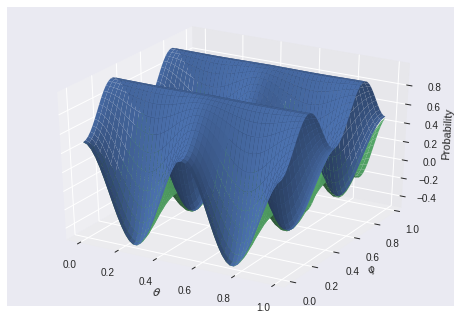

In [62]:
phi = np.arange(0.0, 1.0, 0.02)
theta = np.arange(0.0, 1.0, 0.02)

p0_array = np.zeros([len(theta),len(phi)])
p1_array = np.zeros([len(theta),len(phi)])
         
psi1 = zero_state

for i in range(len(phi)):
  for j in range(len(theta)):
    # calculate psi2
    psi2 = np.sin(2 * np.pi * theta[j]) * zero_state + np.exp( 2 * np.pi * 1j * phi[i]) * np.cos(2 * np.pi * theta[j]) *one_state
    temp = swap_test(psi1, psi2)
    p0_array[j][i] = temp[0]
    p1_array[j][i] = temp[1]
    

fig = plt.figure()       
graph = fig.add_subplot(111,projection='3d')
X,Y = np.meshgrid(theta,phi)
surf1 = graph.plot_surface(X, Y, p0_array)
surf2 = graph.plot_surface(X, Y, p1_array)

graph.set_xlabel('$\\theta$')
graph.set_ylabel('$\\varphi$')
graph.set_zlabel('Probability')